# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [4]:
#Import Numpy
import numpy as np
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: 
n_train = len(X_train)# Number of training examples

n_validation = len(X_valid)# Number of validation examples

n_test = len(X_test)# Number of testing examples

image_shape = np.shape(X_train[0])# shape of an traffic sign image


n_classes = len(np.unique(y_train))#Number of unique classes/labels there are in the dataset.

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import csv
%matplotlib inline

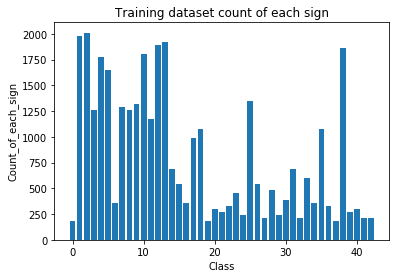

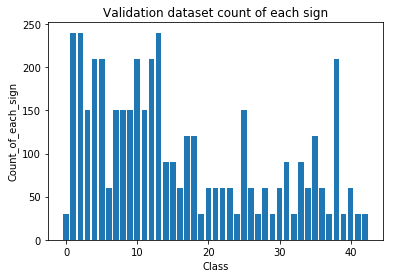

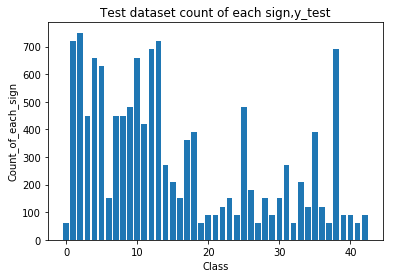

In [7]:
def graph_plot(title_for_graph,labels_for_graph):
    train_labels, train_labels_count = np.unique(labels_for_graph, return_counts = True)
    plt.bar(train_labels, train_labels_count)
    plt.title(title_for_graph)
    plt.ylabel('Count_of_each_sign')
    plt.xlabel('Class')
    plt.show()
graph_plot("Training dataset count of each sign",y_train)
graph_plot("Validation dataset count of each sign",y_valid)
graph_plot("Test dataset count of each sign,y_test",y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Preprocess the Data Set (applying grayscale,normalization)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

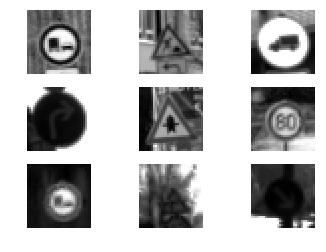

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

#Averaging done to perform grayscale of training images
X_train=np.average(X_train,axis=3, weights=[0.299, 0.587,0.114])

#Normalizing the training image
X_train=-np.log(1/((1 + X_train)/257) - 1)#This is one such method to normalize the image, we can normalize the image in other way also

#Averaging done to perform grayscale of Validation images
X_valid=np.average(X_valid,axis=3, weights=[0.299, 0.587,0.114])

#Normalizing the Validation image
X_valid=-np.log(1/((1 + X_valid)/257) - 1)

#Averaging done to perform grayscale of testing images
X_test=np.average(X_test,axis=3, weights=[0.299, 0.587,0.114])

#Normalizing the test image
X_test=-np.log(1/((1 + X_test)/257) - 1)#This is one such method to normalize the image, we can normalize the image in other way also

im3, im4 = plt.subplots(3,3)# separating images in 3 rows/ 3 columns
im3.subplots_adjust(hspace = .2, wspace=.02)
im4 = im4.reshape(-1)
for i in range(9):
    index = random.randint(0, len(X_valid))
    image = X_valid[index]
    im4[i].axis('off')
    im4[i].imshow(image,cmap='gray')
   

In [9]:
#RESHAPING THE IMAGES

X_train=X_train.reshape(34799, 32, 32,1)
#print(im_g_norm_train.reshape(34799, 32, 32,1))
X_valid=X_valid.reshape(4410, 32, 32,1)
#im_g_norm_valid=im_g_norm_valid.reshape(4410, 32, 32,1)
#print(img_1.shape,im_gray_valid.shape)
X_test=X_test.reshape(12630, 32, 32,1)


### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
#Import tensorflow
import tensorflow as tf
#Import flatten
from tensorflow.contrib.layers import flatten

EPOCHS = 40
BATCH_SIZE = 128


def LeNet(x):    
    # To perform  tf.truncated_normal,we need to define these 2 variables
    mu = 0
    sigma = 0.1
    
    # This is Layer 1 where Input is 32x32x1 and Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation for the first layer
    conv1 = tf.nn.relu(conv1)
    

    # Dropout performed in order to decrease dependency on any single layer
    conv1=tf.nn.dropout(conv1,k_prob)
    #Pooling with the help of max_pool function
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    

    # For Layer 2: where Output is 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Relu Activation.
    conv2 = tf.nn.relu(conv2)
    

    #Dropout to decrease dependency on any single layer
    conv2=tf.nn.dropout(conv2,k_prob)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten done in order to perform Fully Connected layer where Input is 5x5x16 and Output is 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected where Input is 400 and Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Relu Activation.
    fc1    = tf.nn.relu(fc1)
   # fc1=tf.nn.dropout(fc1,0.5)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2=tf.nn.dropout(fc2,k_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

print("Le Net Function Done")

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
k_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)
print("One hot assgined")


C:\Users\lenovo\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Le Net Function Done
One hot assgined


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.00098

logits = LeNet(x)
softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(softmax_cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
print("Logits Values assigned")

Logits Values assigned


In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,k_prob: 1.0})
        total_accuracy =total_accuracy+ (accuracy * len(batch_x))
    return total_accuracy * (1/num_examples)


In [13]:
from sklearn.utils import shuffle

#X_train, y_train = shuffle(im_g_norm_train, y_train)
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training.......")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,k_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training.......

EPOCH 1 ...
Validation Accuracy = 0.722
Training Accuracy = 0.759

EPOCH 2 ...
Validation Accuracy = 0.827
Training Accuracy = 0.873

EPOCH 3 ...
Validation Accuracy = 0.864
Training Accuracy = 0.908

EPOCH 4 ...
Validation Accuracy = 0.886
Training Accuracy = 0.941

EPOCH 5 ...
Validation Accuracy = 0.906
Training Accuracy = 0.957

EPOCH 6 ...
Validation Accuracy = 0.917
Training Accuracy = 0.962

EPOCH 7 ...
Validation Accuracy = 0.912
Training Accuracy = 0.968

EPOCH 8 ...
Validation Accuracy = 0.935
Training Accuracy = 0.972

EPOCH 9 ...
Validation Accuracy = 0.929
Training Accuracy = 0.976

EPOCH 10 ...
Validation Accuracy = 0.932
Training Accuracy = 0.979

EPOCH 11 ...
Validation Accuracy = 0.938
Training Accuracy = 0.982

EPOCH 12 ...
Validation Accuracy = 0.933
Training Accuracy = 0.981

EPOCH 13 ...
Validation Accuracy = 0.936
Training Accuracy = 0.987

EPOCH 14 ...
Validation Accuracy = 0.937
Training Accuracy = 0.987

EPOCH 15 ...
Validation Accuracy = 0.944

In [65]:
#FOR TEST DATA
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    test_saver=tf.train.import_meta_graph('lenet.meta')
    test_saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_accuracy=evaluate(X_test,y_test)
    print("Test Accuracy is {:.3f}".format(test_accuracy))
    

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy is 0.935


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Predict the Sign Type for Each Image

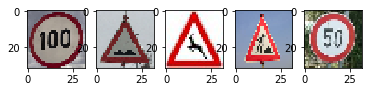

In [76]:
import csv
import os
import matplotlib.pyplot as plt

test_images = []
test_label =np.array([7,22,31,25,2])

path = './test_image_check/'
for image in os.listdir(path):
    img = cv2.imread(path + image)
    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(img)
    
    
test_images=np.array(test_images)

for i in range(0,len(test_label)):
    grid = plt.subplot(len(test_images)/5,5,i+1)
    grid.imshow(test_images[i])
    

    
    
    
    

In [77]:
test_images=np.average(test_images,axis=3, weights=[0.299, 0.587,0.114])
test_images=-np.log(1/((1 + test_images)/257) - 1)
test_images=test_images.reshape(5,32,32,1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    test_saver=tf.train.import_meta_graph('lenet.meta')
    test_saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_accuracy=evaluate(test_images,test_label)
    print("Test Accuracy is : {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy is : 0.800


###  Top  Softmax Probabilities For Each Image Found on the Web

In [79]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #Restoring the session
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #Applyin softmax for test_images
    softmax_for_test_images = tf.nn.softmax(logits)
    results = sess.run(softmax_for_test_images, feed_dict={x: test_images, y:test_label, k_prob:1.0})
    #using function tf.nn.top_k to 
    top_predictions=sess.run(tf.nn.top_k(results, k=5))
    #printing the top predictions
    print(top_predictions)

INFO:tensorflow:Restoring parameters from .\lenet
TopKV2(values=array([[9.8489910e-01, 8.7433644e-03, 4.3845880e-03, 1.2315231e-03,
        3.1527830e-04],
       [9.9993706e-01, 3.5575526e-05, 1.4677942e-05, 6.3626476e-06,
        3.6109179e-06],
       [9.9996829e-01, 3.1691019e-05, 9.8417482e-11, 2.4452581e-11,
        2.3664421e-12],
       [9.8593706e-01, 1.2191718e-02, 7.1261759e-04, 3.0695664e-04,
        1.6077835e-04],
       [3.5279000e-01, 2.4033788e-01, 9.0480164e-02, 6.5326266e-02,
        5.7112809e-02]], dtype=float32), indices=array([[ 5,  3,  2,  7, 10],
       [22, 26, 18, 25, 29],
       [31, 21, 23, 25, 11],
       [25, 31, 20, 18, 19],
       [ 2,  1,  5,  4,  8]]))


In [80]:
#Storing some of the labels from signnames.csv file in variable sign_values
sign_values = np.genfromtxt('signnames.csv', skip_header=2, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')

#Displaying top predictions
for i in range(0,len(test_label)):
    print((top_predictions[0][i][0]), "\t", top_predictions[1][i][0] , "\t", sign_values[top_predictions[1][i][0]][1]
        ,"\t \t",sign_values[test_label[i]][1])

0.9848991 	 5 	 b'End of speed limit (80km/h)' 	 	 b'Speed limit (120km/h)'
0.99993706 	 22 	 b'Slippery road' 	 	 b'Slippery road'
0.9999683 	 31 	 b'End of all speed and passing limits' 	 	 b'End of all speed and passing limits'
0.98593706 	 25 	 b'Traffic signals' 	 	 b'Traffic signals'
0.35279 	 2 	 b'Speed limit (60km/h)' 	 	 b'Speed limit (60km/h)'


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")